In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.gen_Distribution import *
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.To_Draw import *
from TO_sim.Multi_m import createFolder

In [9]:
t_end = 1000
m = 6
N = 50
dist = "Quantile Lorentzian"
dK = 0.2
dt = 0.1
Ks, t_dic, rs_dic, t_r_dic, rs_r_dic = Hysteresis(m,N=N,dK=dK,t_end=t_end,dist=dist,dt=dt)

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

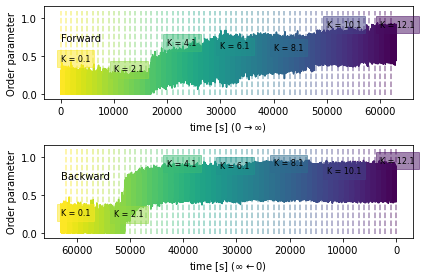

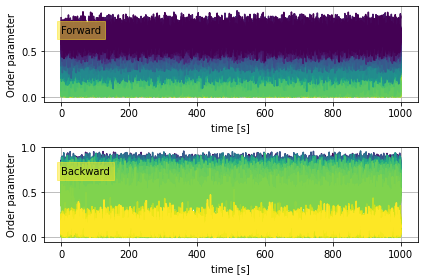

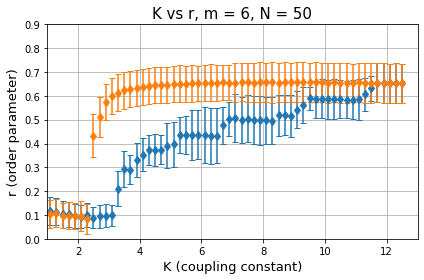

In [10]:
createFolder(f"Review3/m = {m}")
Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,save=True,Folder_name=f"Review3/m = {m}")
# Time_R(Ks,t_dic,rs_dic,t_r_dic,rs_r_dic,dK,dt,t_end,N,m,save=True,Folder_name="Review")

# Multiprocess

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

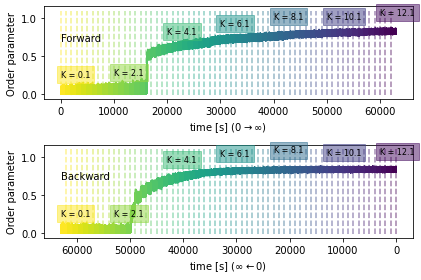

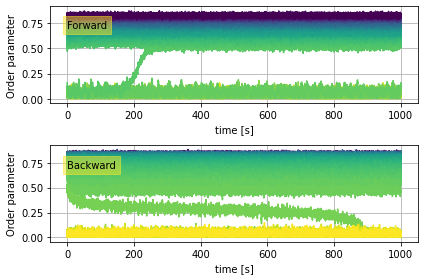

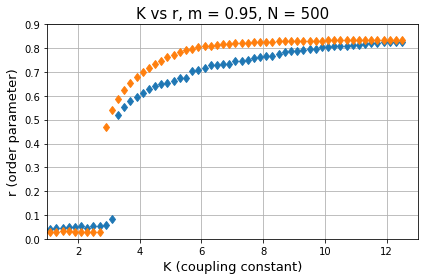

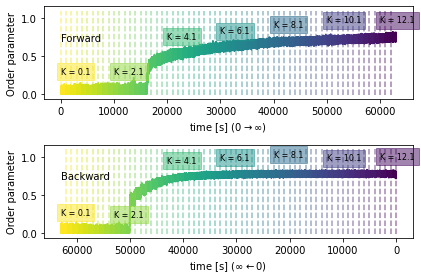

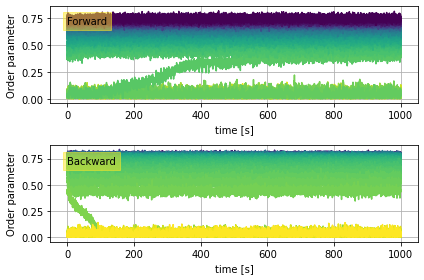

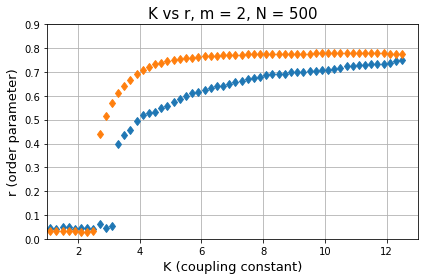

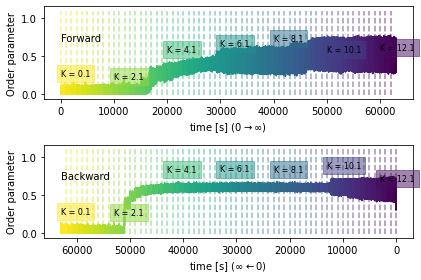

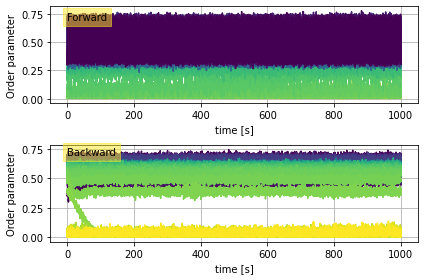

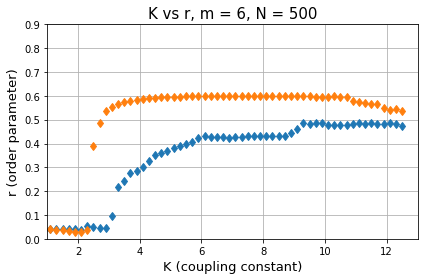

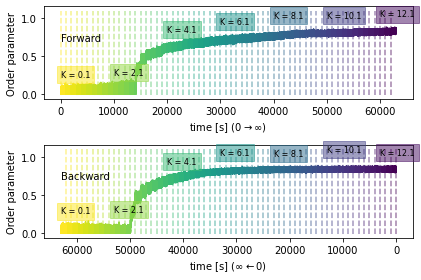

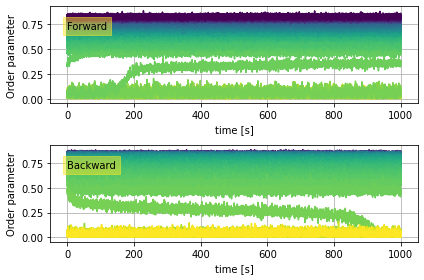

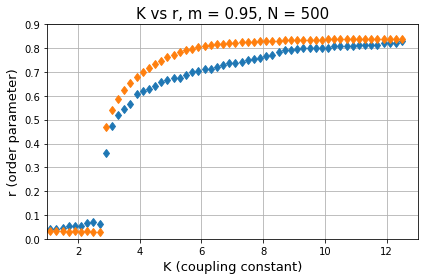

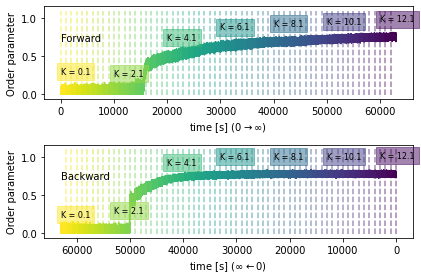

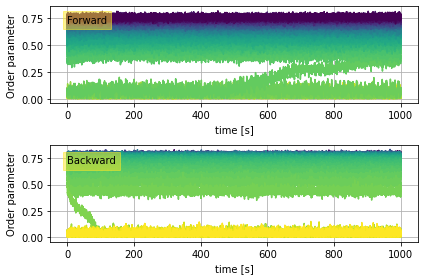

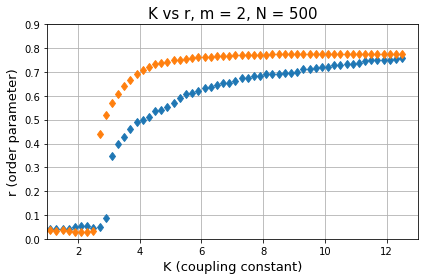

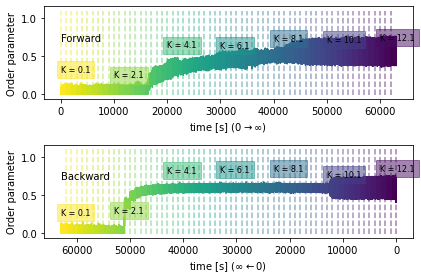

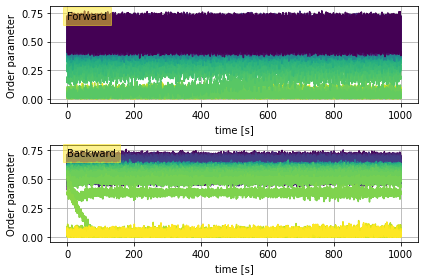

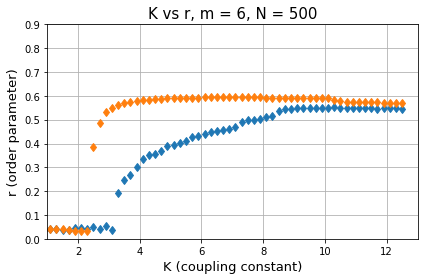

In [2]:
# Multiprocess
from TO_sim.Multi_m import Sim_Multi_mset,Sim_Multi_m_giveNoise, Sim_Multi_mset_Noise
import parmap
for Noise in [9e-2,10e-2]:
    Sim_Multi_mset_Noise(Noise)

# 231025

## RE Foward 3

In [1]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [3]:
df_read = pd.read_excel('Order parameter and secondary cluster2.xlsm',index_col=[0,1])
ms = df_read['r_mean_d'].unstack().columns
core = 14
index_ = 0
Ks = np.arange(0.1,10+0.05,0.1)
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 3
len(m_set)
df = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d','r_sec_ul','r_sec_ud'])
df = df.set_index(['K','m'])

In [4]:
for m in tqdm(m_set[num][:]):
    # m = round(m,2)
    r_ds = df_read['r_mean_d'].unstack()[m].to_numpy()
    r_us  = df_read['r_mean_u'].unstack()[m].to_numpy()
    r_mds = df_read['r_main_d'].unstack()[m].to_numpy()
    r_mus = df_read['r_main_u'].unstack()[m].to_numpy()
    r_sds,r_sus,r_su_ls,r_su_ds = rs_N_numpy(Ks,m,r_mus,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su,r_su_l,r_su_d in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus,r_su_ls,r_su_ds):
        df.loc[(K,m),'r_mean_d'] = r_d
        df.loc[(K,m),'r_mean_u'] = r_u
        df.loc[(K,m),'r_main_d'] = r_md
        df.loc[(K,m),'r_main_u'] = r_mu
        df.loc[(K,m),'r_sec_d'] = r_sd
        df.loc[(K,m),'r_sec_u'] = r_su
        df.loc[(K,m),'r_sec_ul'] = r_su_l
        df.loc[(K,m),'r_sec_ud'] = r_su_d

  0%|          | 0/14 [00:00<?, ?it/s]

0.05944614377796051
0.05355955133801101
0.04655098718647535
0.156268177638131
0.041104202790189254
0.1589148678497719
0.03878528200041828
0.03550373579914643
0.03377062344864781
0.03277226218057189


In [5]:
df.sort_index().to_excel(f'231026 MULTI/{num} Order parameter and secondary cluster.xlsm')

In [ ]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df['r_sec_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T)
plt.colorbar()

In [23]:
df_old = pd.read_excel(f'231025 MULTI/{num} Order parameter and secondary cluster.xlsm',index_col=[0,1])
df_old

r_mean_u  r_mean_d  r_main_u  r_main_d   r_sec_u   r_sec_d  \
K    m                                                                 
0.1  6.4       NaN       NaN       NaN       NaN       NaN       NaN   
     6.5       NaN       NaN       NaN       NaN       NaN       NaN   
     6.6       NaN       NaN       NaN       NaN       NaN       NaN   
     6.7       NaN       NaN       NaN       NaN       NaN       NaN   
     6.8       NaN       NaN       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
10.0 7.6  0.755075  0.003887  0.792577  0.024357  0.079821  0.004426   
     7.7  0.750025  0.003887  0.788111  0.024357  0.080205  0.003254   
     7.8  0.744975  0.003887  0.783646  0.024357  0.081824  0.003317   
     7.9  0.739925  0.003887  0.779184  0.024357  0.083444  0.003381   
     8.0  0.732350  0.003887  0.773919  0.024357  0.084522  0.003477   

          r_sec_ul  r_sec_ud  
K    m                        
0.1  6.4       NaN       NaN  
     6.5       NaN       NaN  
     6.6       NaN       NaN  
     6.7       NaN       NaN  
     6.8       NaN       NaN  
...            ...       ...  
10.0 7.6  0.081697 -0.004680  
     7.7  0.083052 -0.004798  
     7.8  0.084291 -0.004953  
     7.9  0.085496 -0.005112  
     8.0  0.087309 -0.005328  

[1700 rows x 8 columns]

In [26]:
df_new = pd.read_excel(f'231025 MULTI/{num}-2 Order parameter and secondary cluster.xlsm',index_col=[0,1])
df_new

r_mean_u  r_mean_d  r_main_u  r_main_d   r_sec_u   r_sec_d  \
K    m                                                                 
0.1  8.0       NaN       NaN       NaN       NaN       NaN       NaN   
     8.1       NaN       NaN       NaN       NaN       NaN       NaN   
     8.2       NaN       NaN       NaN       NaN       NaN       NaN   
     8.3       NaN       NaN       NaN       NaN       NaN       NaN   
     8.4       NaN       NaN       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
10.0 8.0  0.732350  0.003887  0.773919  0.024357  0.084522  0.003477   
     8.1  0.729825  0.003256  0.770269  0.020403  0.085319  0.003509   
     8.2  0.722250  0.003256  0.764995  0.020403  0.086309  0.003604   
     8.3  0.719725  0.003256  0.761371  0.020403  0.087093  0.003636   
     8.4  0.714675  0.003256  0.756929  0.020403  0.088662  0.002260   

          r_sec_ul  r_sec_ud  
K    m                        
0.1  8.0       NaN       NaN  
     8.1       NaN       NaN  
     8.2       NaN       NaN  
     8.3       NaN       NaN  
     8.4       NaN       NaN  
...            ...       ...  
10.0 8.0  0.087309 -0.005328  
     8.1  0.087962 -0.005393  
     8.2  0.089718 -0.005612  
     8.3  0.090352 -0.005678  
     8.4  0.091420 -0.005848  

[500 rows x 8 columns]

In [29]:
df_old.combine_first(df_new).sort_index().to_excel(f'231025 MULTI/{num} new Order parameter and secondary cluster.xlsm')

In [19]:
df_new_temp = df_new.reset_index()

In [21]:
df = pd.merge(df_temp,df_new_temp,how='outer')

In [22]:
df

,K,m,r_mean_u,r_mean_d,r_main_u,r_main_d,r_sec_u,r_sec_d,r_sec_ul,r_sec_ud
0,0.1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.2,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.5,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2174,10.0,8.0,0.73235,0.003887,0.773919,0.024357,0.084522,0.003477,0.087309,-0.005328
2175,10.0,8.1,0.729825,0.003256,0.770269,0.020403,0.085319,0.003509,0.087962,-0.005393
2176,10.0,8.2,0.72225,0.003256,0.764995,0.020403,0.086309,0.003604,0.089718,-0.005612
2177,10.0,8.3,0.719725,0.003256,0.761371,0.020403,0.087093,0.003636,0.090352,-0.005678


# 새로운 알고리즘으로 시뮬레이션

In [1]:
import warnings
from tqdm.notebook import tqdm
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import pandas as pd
from scipy.stats import uniform
from scipy.stats import cauchy
warnings.filterwarnings(action='ignore')

In [9]:
df = pd.DataFrame(columns=['K','m','rM_u','rM_d',
                           'r0_u','r0_d','rd_u','rd_d',
                           'r+_ul','r+_drift','mu',
                           'r+_total_u','r+_total_d','r+_total_ul','r+_total_ud'])
df = df.set_index(['K','m'])

In [3]:
Ks = np.arange(0.0,10+0.05,0.1)
ms = np.arange(0.0,10+0.05,0.1)

In [4]:
def g_u(x):
    return uniform.pdf(x,-3,6)
def g_sec(x,Or,Om):
    g = uniform.pdf(x+Om,-3,6)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [11]:
def g_u(x):
    return cauchy.pdf(x,0,1)
def g_sec(x,Or,Om):
    g = cauchy.pdf(x+Om,0,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [12]:
core = 31
index_ = 0
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 3

In [13]:
for m in tqdm(m_set[num]):
    F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m,g_n=g_u)
    r_du = lambda x: (F_R0u(x)-F_RMu(x))
    r_dd = lambda x: (F_R0d(x)-F_RMd(x))
    r_dp = lambda x: (F_R0u(x)-F_RMu(x))/2

    rs_d,rs_u,rs_dl,rs_ul,md,mu = OSP2.get_r_sec_np(Ks,m,F_RMu,g_sec=g_sec,samples=100)
    rs_uF = np.where(r_dp(Ks)<=rs_ul,rs_ul,np.nan)
    for i,K in enumerate(Ks):
        df.loc[(K,m),'rM_d'] = F_RMd(K)
        df.loc[(K,m),'rM_u'] = F_RMu(K)
        df.loc[(K,m),'r0_d'] = F_R0d(K)
        df.loc[(K,m),'r0_u'] = F_R0u(K)
        df.loc[(K,m),'rd_u'] = r_du(K)
        df.loc[(K,m),'rd_d'] = r_dd(K)
        df.loc[(K,m),'r+_ul'] = rs_uF[i]
        df.loc[(K,m),'r+_drift'] = r_dp(K)
        df.loc[(K,m),'mu'] = mu[i]
        df.loc[(K,m),'r+_total_d'] = rs_d[i]
        df.loc[(K,m),'r+_total_u'] = rs_u[i]
        df.loc[(K,m),'r+_total_d'] = rs_dl[i]
        df.loc[(K,m),'r+_total_u'] = rs_ul[i]

  0%|          | 0/8 [00:00<?, ?it/s]

In [7]:
df.sort_index().to_excel(f'231108 MULTI/{num} UNIFORM Order parameter and secondary cluster.xlsm')

In [6]:
df.sort_index().to_excel(f'231108 MULTI/{num} NEW Order parameter and secondary cluster.xlsm')

In [14]:
df.sort_index().to_excel(f'231108 MULTI/{num} CAUCHY Order parameter and secondary cluster.xlsm')